## Heart Attack Risk Analysis

### 1. Introduction
This analysis explores key factors impacting heart attack risk.

- **Brief overview of the dataset:**
  - **Age:** Age of the patient.
  - **Gender:** Gender (0 = Female, 1 = Male).
  - **Heart rate:** Normalized resting heart rate.
  - **Systolic blood pressure:** Normalized systolic BP.
  - **Diastolic blood pressure:** Normalized diastolic BP.
  - **Blood sugar:** Normalized blood sugar level.
  - **CK-MB:** Creatine Kinase-MB enzyme level.
  - **Troponin:** Troponin enzyme level.
  - **Result:** Positive or negative for heart attack.

######
- **Objectives of this analysis:**
  - Identify trends of heart attacks.
  - Form understandings on prevention strategies.
  - Answer the following questions with dataset.


### Questions Explored:
1. What factors are most strongly correlated with heart attack?
2. How do gender and age impact heart attack outcomes?
3. What trends can we identify in systolic and diastolic blood pressure?


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
heart = pd.read_csv('Medicaldataset.csv')

In [201]:
print(heart.head())
print(heart.dtypes)

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   63       1          66                      160                        83   
1   20       1          94                       98                        46   
2   56       1          64                      160                        77   
3   66       1          70                      120                        55   
4   54       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float

In [203]:
# Convert Result column to numerical values
heart['Result'] = heart['Result'].map({'negative': 0, 'positive': 1})
print(heart['Result'].head())  # Should display 0s and 1s
print(heart.dtypes)  # Confirm Result is now int64


0    0
1    1
2    0
3    1
4    0
Name: Result, dtype: int64
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                        int64
dtype: object


### 2. Data Exploration: 

In [197]:
#Summary statistics of each variable 
print(heart.describe())

               Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.193328     0.659591    78.336619               127.170584   
std      13.638173     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  Result  
count               1319.000000  1319.000000  1319.000000  1319.000000     0.0  
mean                  72.269143   146.634344    15.274306     0.360942     NaN  
std                   14.033924    74.923045    46.327083     1.154568     NaN  
min               

#### Distribution of Age


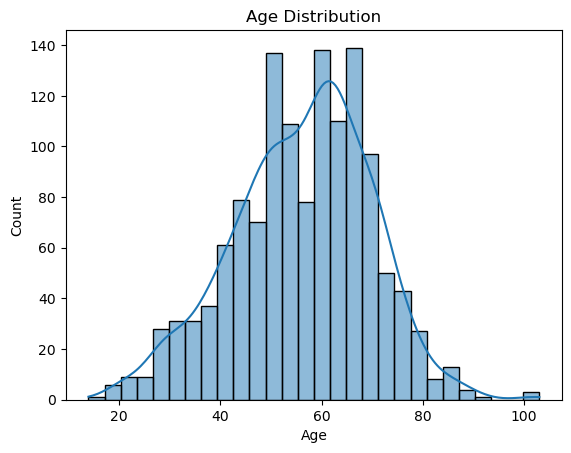

In [115]:
# Distribution of age
sns.histplot(heart['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


#### Gender Distributions

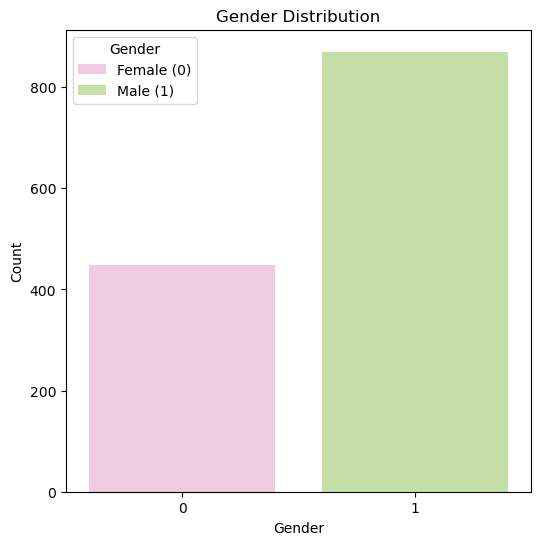

In [234]:
# Heart attack risk by gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=heart, hue = 'Gender',palette='PiYG', legend = True)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')


legend_labels = ['Female (0)', 'Male (1)'] 
plt.legend(title='Gender', labels=legend_labels, loc='upper left')

plt.show()


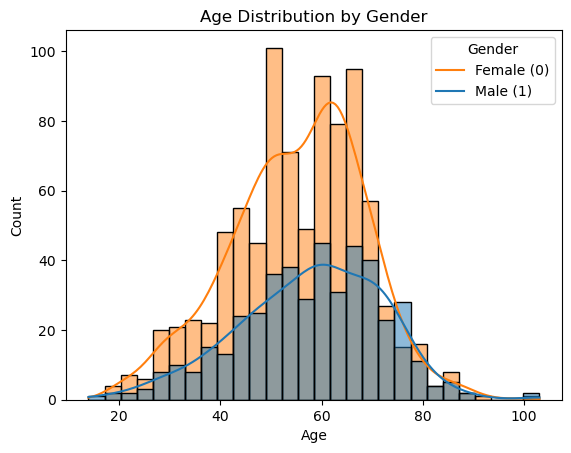

In [164]:
sns.histplot(data=heart, x='Age', hue='Gender', kde=True)
plt.title('Age Distribution by Gender')
legend_labels = ['Female (0)', 'Male (1)'] 
plt.legend(title='Gender', labels=legend_labels, loc='upper right')
plt.show()


#### Blood Pressure Levels Distributions

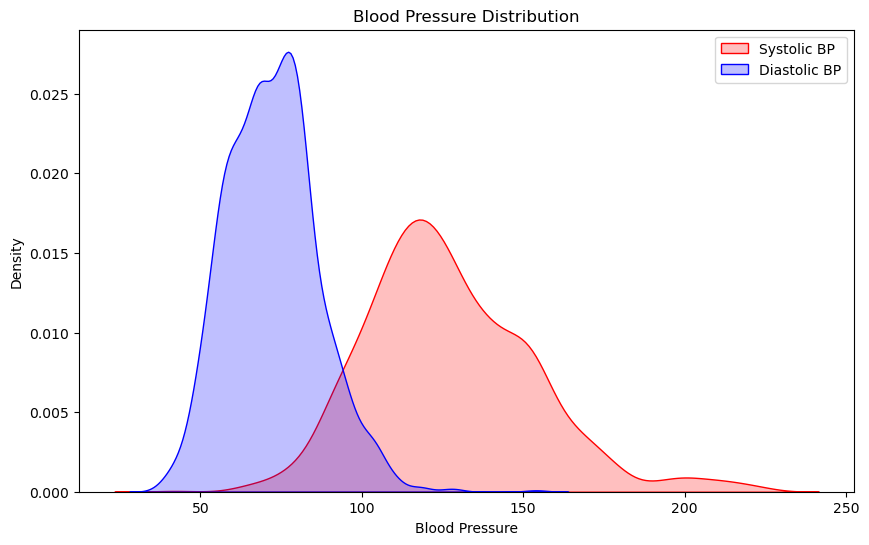

In [162]:
plt.figure(figsize=(10, 6))
sns.kdeplot(heart['Systolic blood pressure'], fill= True, color='red', label='Systolic BP')
sns.kdeplot(heart['Diastolic blood pressure'], fill=True, color='blue', label='Diastolic BP')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Blood Sugar Distribution

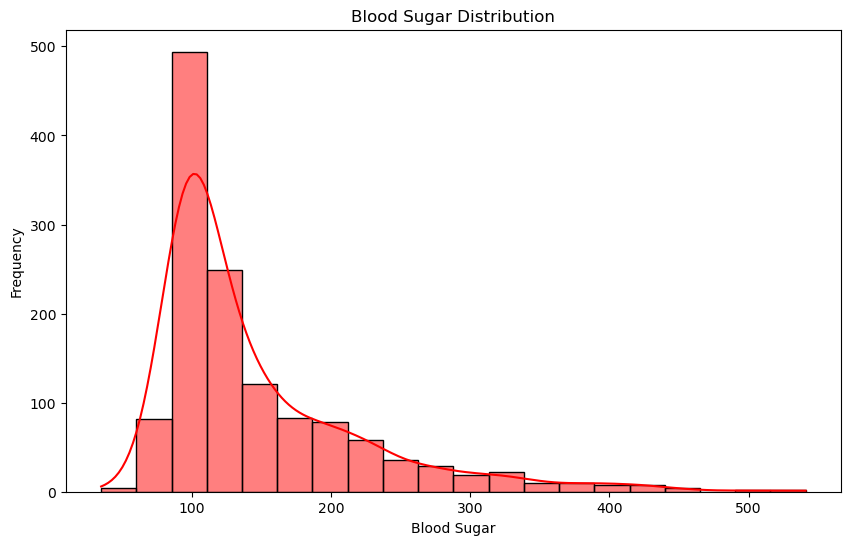

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(heart['Blood sugar'], bins=20, kde=True, color='red')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar')
plt.ylabel('Frequency')
plt.show()

#### CK-MB Distribution

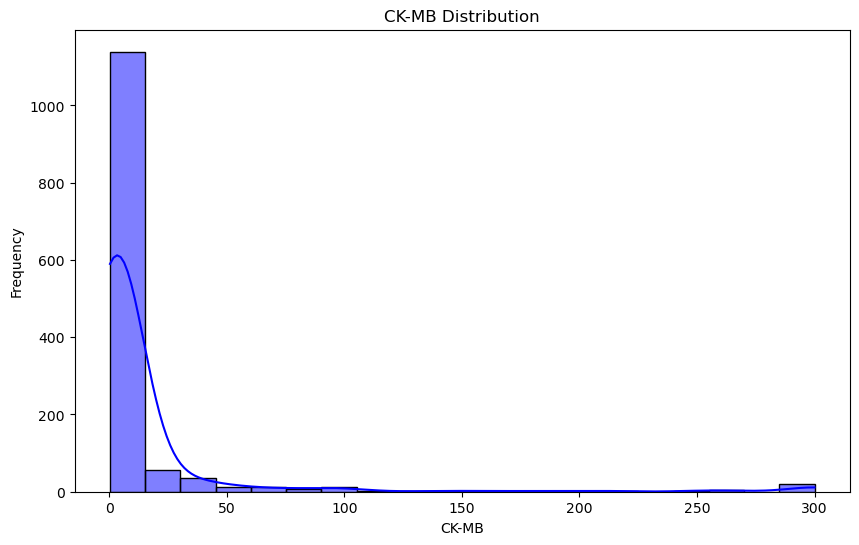

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(heart['CK-MB'], bins=20, kde=True, color='blue')
plt.title('CK-MB Distribution')
plt.xlabel('CK-MB')
plt.ylabel('Frequency')
plt.show()

#### Troponin Distribution

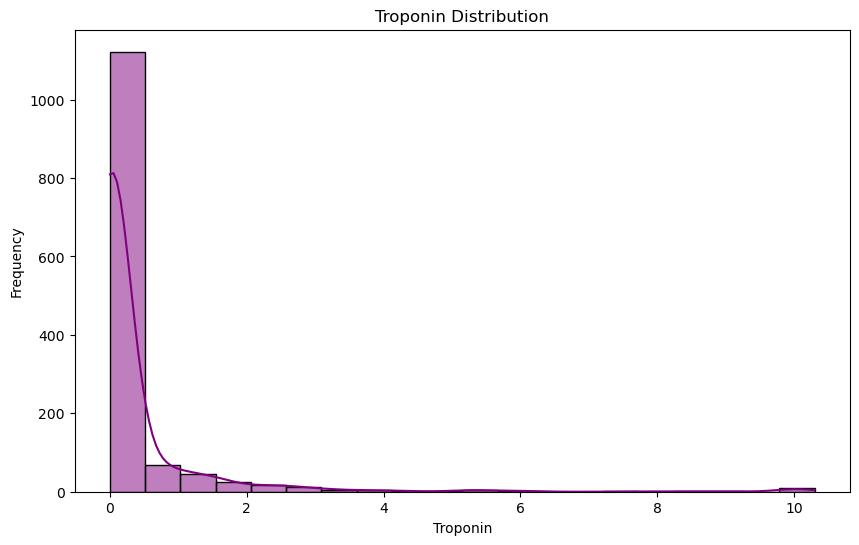

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(heart['Troponin'], bins=20, kde=True, color='purple')
plt.title('Troponin Distribution')
plt.xlabel('Troponin')
plt.ylabel('Frequency')
plt.show()

## 3. Interactions in Dataset


In [219]:
numerical_heart = heart.select_dtypes(include=['int64', 'float64'])


#### Q1: What factors are most strongly correlated with heart attack?


In [ ]:
#sns.pairplot(heart, hue='Result', diag_kind='kde', palette='husl')
#plt.suptitle('Pairplot of Factors vs Heart Attack Risk', y=1.02)
#plt.legend()
#plt.show()


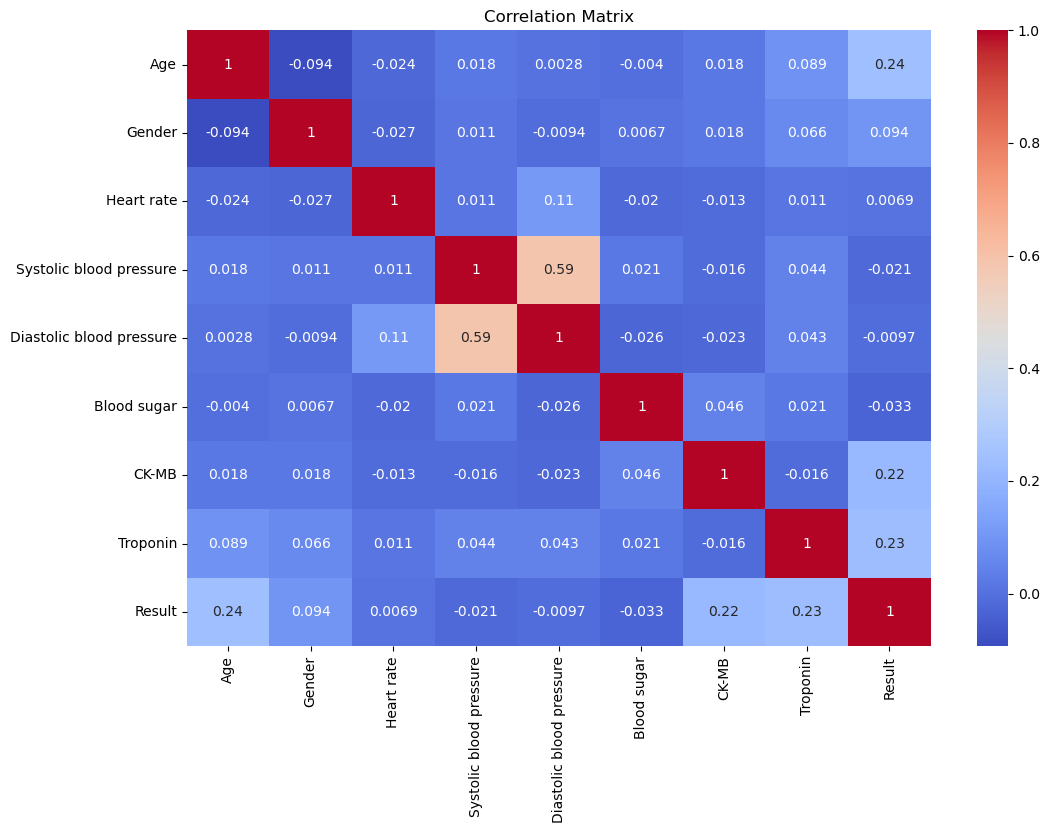

In [211]:
corr = heart.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Insights from the Correlation Matrix:
- **Age:** 
  - The top correlated factor is age, with a correlation of **0.24** (positive correlation) to heart attack results. 
  - This suggests that older individuals are more likely to experience a heart attack.

- **Troponin Levels:** 
  - Troponin levels are the second most correlated factor with heart attack results = **0.23** (positive correlation).
  - Elevated troponin levels are a **strong biomarker** for cardiac events.

- **CK-MB Levels:** 
  - High CK-MB levels also show a correlation with heart attack results, indicating heart muscle damage.
  - Correlated with result positively by **0.22**. 


### 2. How do gender and age impact heart attack outcomes?

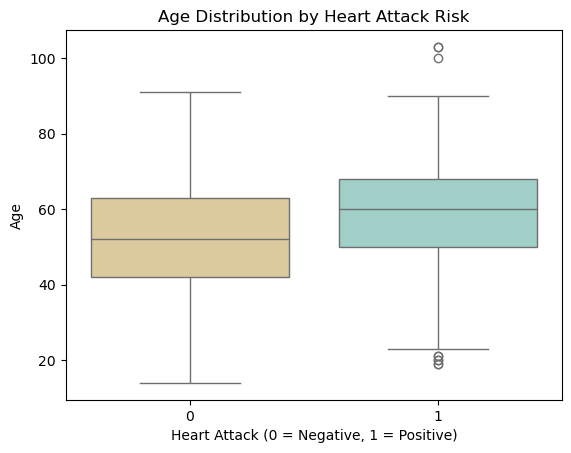

In [232]:
sns.boxplot(x='Result', y='Age', data=heart, hue = 'Result', palette='BrBG', legend = False)
plt.title('Age Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack (0 = Negative, 1 = Positive)')
plt.ylabel('Age')
plt.show()

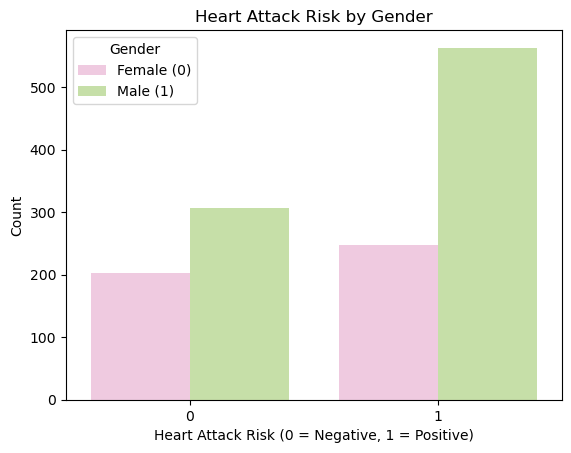

In [241]:
sns.countplot(x='Result', hue='Gender', data=heart, palette='PiYG')
plt.title('Heart Attack Risk by Gender')
plt.xlabel('Heart Attack Risk (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.show()

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = heart[['Age', 'Gender']]
y = heart['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.29      0.39       101
           1       0.67      0.88      0.76       163

    accuracy                           0.65       264
   macro avg       0.63      0.58      0.57       264
weighted avg       0.64      0.65      0.62       264



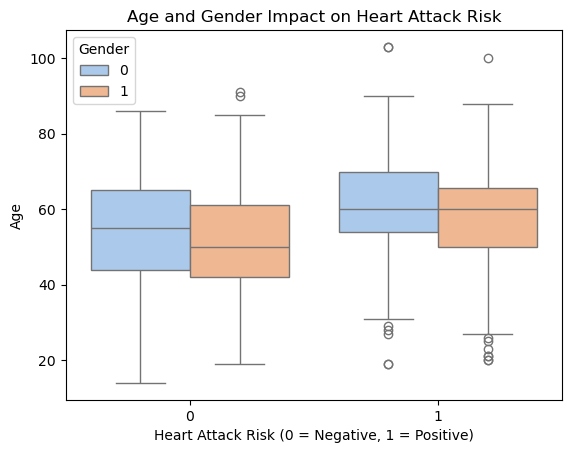

In [346]:

sns.boxplot(x='Result', y='Age', hue='Gender', data=heart, palette= 'pastel')
plt.title('Age and Gender Impact on Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0 = Negative, 1 = Positive)')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


##### Insights on Heart Attack Risk with Gender and/or Age:
- **Age:**
    - The box plot shows that older individuals are more likely to experience a heart attack than younger individuals.
- **Gender:**
    - The figure above displays the counts of positive and negative heart attack results for males and females. Males have a significantly higher number of positive heart attack outcomes compared to females.

#### 3. What trends can we identify in systolic and diastolic blood pressure?

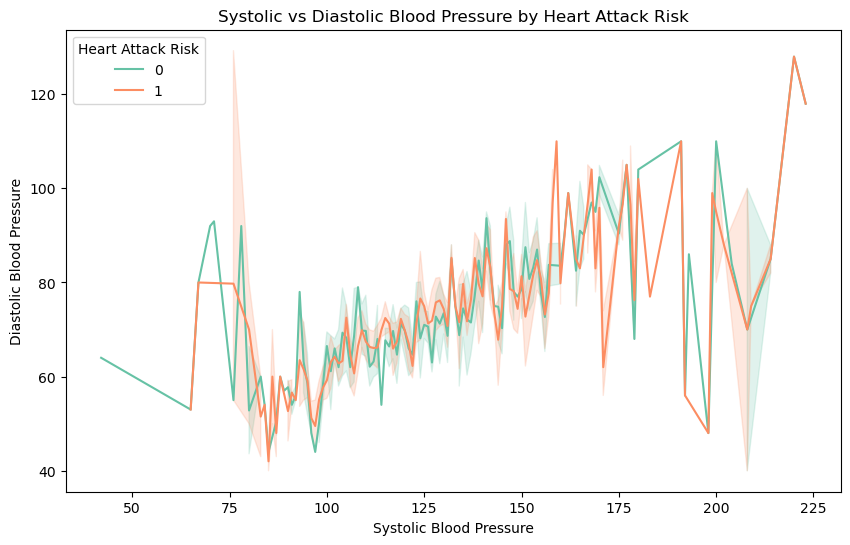

In [285]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Systolic blood pressure', y='Diastolic blood pressure', hue='Result', data=heart, palette='Set2')
plt.title('Systolic vs Diastolic Blood Pressure by Heart Attack Risk')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')

plt.legend(title='Heart Attack Risk')
plt.show()


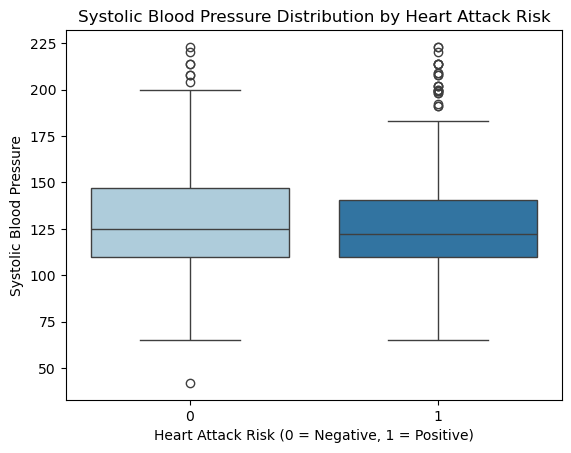

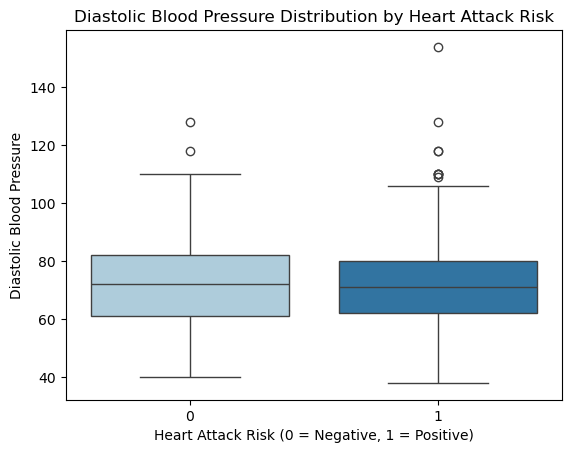

In [363]:
sns.boxplot(x='Result', y='Systolic blood pressure', data=heart, hue = 'Result', palette='Paired', legend= False)
plt.title('Systolic Blood Pressure Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0 = Negative, 1 = Positive)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

sns.boxplot(x='Result', y='Diastolic blood pressure', data=heart, hue = 'Result', palette='Paired', legend= False)
plt.title('Diastolic Blood Pressure Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0 = Negative, 1 = Positive)')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

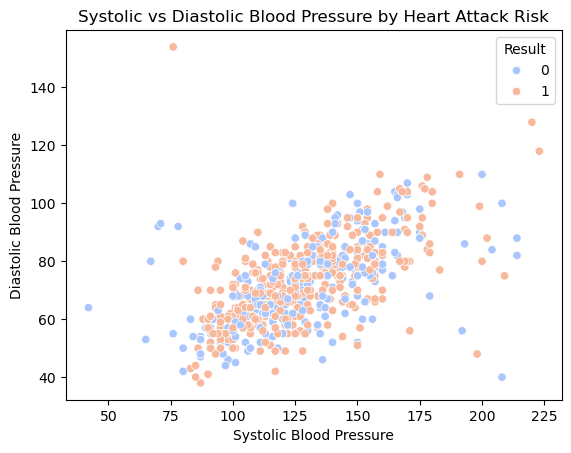

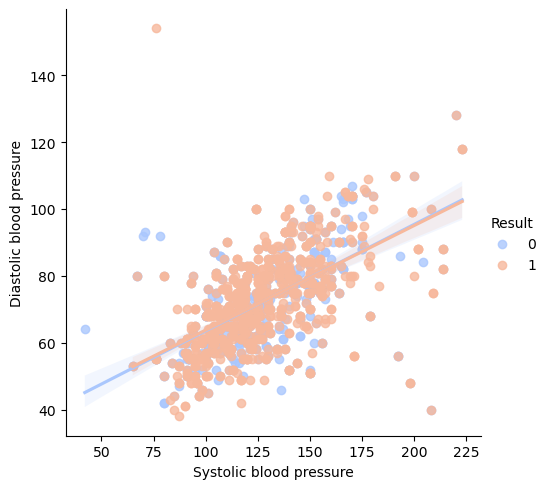

In [355]:
sns.scatterplot(x='Systolic blood pressure', y='Diastolic blood pressure', hue='Result', data=heart, palette='coolwarm')
plt.title('Systolic vs Diastolic Blood Pressure by Heart Attack Risk')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

sns.lmplot(x='Systolic blood pressure', y='Diastolic blood pressure', hue='Result', data=heart, palette='coolwarm')


##### Insights on Systolic and Diastolic Blood Pressure on Heart Attacks:
- **General Trend:** 
  - Systolic and diastolic blood pressure tend to increase together.
  - As systolic blood pressure rises, diastolic blood pressure also shows an upward trend, although the relationship isn't perfectly linear.
  - The physiological link does not visibly indicate that either systolic or diastolic blood pressure alone directly contributes to increased cardiac events.



### 4. Conclusion

These findings collectively highlight the multifactorial nature of heart attack risks, where age, gender, troponin, and CK-MB levels emerge as critical indicators from the correlation matrix. While blood pressure presents an important physiological metric, its relationship to cardiac events is not conclusive based on current data. Effective risk prediction and prevention require a comprehensive approach incorporating these multiple dimensions.